In [1]:
import datetime 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset 

train = pd.read_csv("E:\\Edubridge\\Kaggle\\Analytics\\train.csv")
test = pd.read_csv("E:\\Edubridge\\Kaggle\\Analytics\\test.csv")
sample = pd.read_csv("E:\\Edubridge\\Kaggle\\Analytics\\sample.csv")

In [3]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


## Data Pre-Processing

In [5]:
# Converting datetime from object datatype to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

## Train Dataset

In [6]:
# Creating new column year using date column
# parse datetime colum & add new time related columns

train['year'] = train['date'].dt.year
train['month']= train['date'].dt.month
train['day']= train['date'].dt.day
train['dayofyear'] = train['date'].dt.dayofyear
train['weekday']= train['date'].dt.weekday
train['weekofyear'] = train['date'].dt.weekofyear

#### Adding More columns to the dataset Season, working day and peak hour 

In [13]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]

month_to_season = dict(zip(range(1,13), seasons))
## Winter = 1 (Month - 1,2,12)
## Spring = 2 (Month - 3,4,5)
## Summer = 3 (Month - 6,7,8)
# Autumn = 4  (Month - 9,10,11)

month_to_season 

{1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}

In [15]:
train['season']= train.month.map(month_to_season) 

In [16]:
train.weekday.unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

In [17]:
working = [0,1,1,1,1,1,0]

working_day = dict(zip(range(0,7), working))
# Sunday - 0
# Monday  - 1
# Tuesday - 2
# Wednesday - 3
# Thursday - 4
# Friday - 6
# Saturnday -6

working_day

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0}

In [18]:
train['working_day']= train.weekday.map(working_day) 

In [19]:
train['peak'] = train[['hour', 'working_day']].apply(lambda x: (0, 1)[(x['working_day'] == 1 
                                                                       and  
                                                                      ( x['hour'] 
                                                                       == 8 or 17 <= x['hour'] 
                                                                       <= 18 or 12 <= x['hour'] 
                                                                       <= 13)) or (x['working_day']
                                                                                   == 0 and  10 
                                                                                   <= x['hour'] 
                                                                                   <= 19)], axis = 1)

In [21]:
## Checking for Null Values
train.isna().sum()

date           0
hour           0
demand         0
year           0
month          0
day            0
dayofyear      0
weekday        0
weekofyear     0
season         0
working_day    0
peak           0
dtype: int64

In [22]:
train.drop_duplicates(subset=None, inplace=True)

In [23]:
train.shape

(18247, 12)

### Test Datset 

In [15]:
# Creating new columns in test dataset

test['year']= test['date'].dt.year
test['month']= test['date'].dt.month
test['day']= test['date'].dt.day
test['weekday']= test['date'].dt.weekday
test['weekofyear'] = test['date'].dt.weekofyear

In [16]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]

month_to_season = dict(zip(range(1,13), seasons))
## Winter = 1 (Month - 1,2,12)
## Spring = 2 (Month - 3,4,5)
## Summer = 3 (Month - 6,7,8)
# Autumn = 4  (Month - 9,10,11)

month_to_season 

{1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}

In [17]:
test['season']= test.month.map(month_to_season)

In [39]:
working = [0,1,1,1,1,1,0]

working_day = dict(zip(range(0,7), working))
# Sunday - 0
# Monday  - 1
# Tuesday - 2
# Wednesday - 3
# Thursday - 4
# Friday - 6
# Saturnday -6

working_day

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0}

In [40]:
test['working_day']= test.weekday.map(working_day) 

In [47]:
test['peak'] = test[['hour', 'working_day']].apply(lambda x: (0, 1)[(x['working_day'] == 1 
                                                                       and  
                                                                      ( x['hour'] 
                                                                       == 8 or 17 <= x['hour'] 
                                                                       <= 18 or 12 <= x['hour'] 
                                                                       <= 13)) or (x['working_day']
                                                                                   == 0 and  10 
                                                                                   <= x['hour'] 
                                                                                   <= 19)], axis = 1)

In [48]:
test.head()

,hour,year,month,day,weekday,weekofyear,season,working_day,peak
date,,,,,,,,,
2021-03-01,0,2021,3,1,0,9,2,0,0
2021-03-01,1,2021,3,1,0,9,2,0,0
2021-03-01,2,2021,3,1,0,9,2,0,0
2021-03-01,3,2021,3,1,0,9,2,0,0
2021-03-01,5,2021,3,1,0,9,2,0,0


In [49]:
test.head()

,hour,year,month,day,weekday,weekofyear,season,working_day,peak
date,,,,,,,,,
2021-03-01,0,2021,3,1,0,9,2,0,0
2021-03-01,1,2021,3,1,0,9,2,0,0
2021-03-01,2,2021,3,1,0,9,2,0,0
2021-03-01,3,2021,3,1,0,9,2,0,0
2021-03-01,5,2021,3,1,0,9,2,0,0


[Text(0.5, 1.0, 'Demand by Month')]

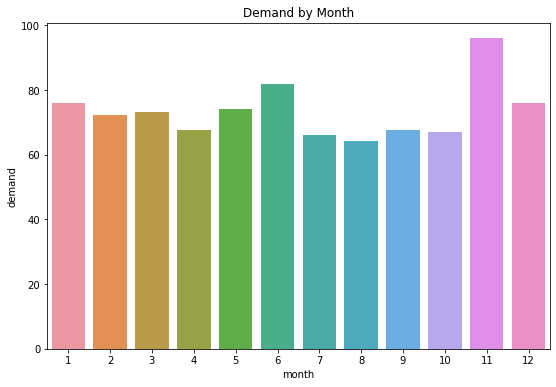

In [50]:
### EDA 
#### demand, month
plt.figure(figsize=(9,6))
monthagg = pd.DataFrame(train.groupby('month')['demand'].mean()).reset_index()
sns.barplot(data=monthagg, x='month',y='demand').set(title = 'Demand by Month')

Text(0.5, 1.0, 'Demand at Different Hours across Years')

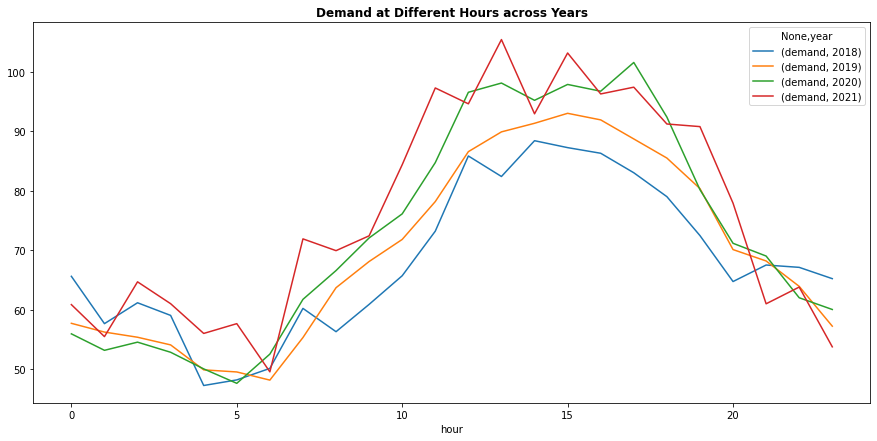

In [51]:
# Plotting demand across hours for each year

piv = pd.pivot_table(train, index=['hour'],columns=['year'], values=['demand'])

piv.plot(figsize=(15, 7)).set_title('Demand at Different Hours across Years', fontweight="bold")

In [52]:
train =train.set_index('date')
train

KeyError: "None of ['date'] are in the columns"

In [53]:
test =test.set_index('date')
test

KeyError: "None of ['date'] are in the columns"

In [54]:
from sklearn.model_selection import train_test_split
X = train.drop(['demand'],axis=1)
y = train['demand']

In [55]:
import xgboost as xg
xgr=xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.6,subsample=0.6)
xgr.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_output=xgr.predict(test)
y_output

array([64.6597  , 53.18963 , 40.479073, ..., 54.626118, 50.239872,
       63.090027], dtype=float32)

In [57]:
# Assigning the data corresponding to the target variable
sample['demand']=y_output

In [58]:
sample.to_csv('summission1.csv',index=False)

In [59]:
sample.head()

,date,hour,demand
0,2021-03-01,0,64.659698
1,2021-03-01,1,53.189629
2,2021-03-01,2,40.479073
3,2021-03-01,3,36.209732
4,2021-03-01,5,20.502712
